<a href="https://colab.research.google.com/github/yutan0565/Wake-up-Word_tensorflow2/blob/main/%EC%88%98%EC%A0%95%EC%82%AC%ED%95%AD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 함수 정의 모음

In [11]:
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal.spectral import spectrogram
import librosa.display

In [142]:
n_fft=1024
hop_length=512
win_length=1024
sample_rate = 32000
sample_time = 1

n_mels=256

n_mfcc=13

cut  = sample_rate*sample_time
click = sample_rate * 0.4

In [35]:
def mel_spectrogram_process(signal, sr):
  # 정규화 만들기
  signal = signal / max(np.abs(signal))
  # 오디오 데이터에 대해서 window size만큼 stft 해주기, 그리고 모두 양수로 만들어 뒤집어 주기
  S = librosa.core.stft(signal, n_fft=n_fft, hop_length=hop_length, win_length=win_length)
  D = np.abs(S)**2  # 모두 양수로 날려주기  
  # n_mels 필터의 모양을 나타낸다.
  mel_basis = librosa.filters.mel(sr, n_fft, n_mels=n_mels)  
  mel_S = np.dot(mel_basis, D)
  # 마지막에는 log로 반환 해좌야 scale이 맞는다
  log_S = librosa.power_to_db(mel_S, ref=np.max)
  return log_S

  
def mfcc_process(signal, sr):
  # 보통 coefficent에서 13까지만 사용함
  log_mel_spectrogram = mel_spectrogram_process(signal, sr)
  mfcc = librosa.feature.mfcc(S=log_mel_spectrogram, n_mfcc=n_mfcc)
  return mfcc


# spectrogram 데이터 정규화
def spectrogram_preprocess(spectrogram):
  revverse_spectrogram = -spectrogram
  cut_spectrogram = revverse_spectrogram[:][:-50]
  zero_spectrogram = np.where( cut_spectrogram > 60 , 0, cut_spectrogram)
  min_value = np.min(zero_spectrogram)
  max_value = np.max(zero_spectrogram)
  min_max_scale_spectrogram =  (zero_spectrogram - min_value) / (max_value - min_value)
  return min_max_scale_spectrogram




# Mel Spectrogram을 사용하는 방식

C:\Users\yutan\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Pass sr=32000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  after removing the cwd from sys.path.


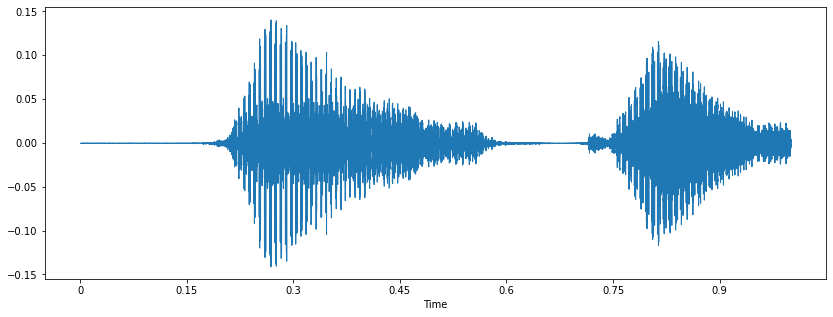

In [187]:
#data_path = "/content/drive/MyDrive/augmentation_dataset/hi_yutan/voice0020_hi_yutan.wav"
data_path = "./augmentation_dataset/user_01/hi_yutan/ori_user_01_0005_hi_yutan.wav"

signal, sr = librosa.core.load(data_path, sample_rate)
fig = plt.figure(figsize = (14,5))
librosa.display.waveshow(signal, sr=sr)

C:\Users\yutan\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Pass sr=32000, n_fft=1024 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  
C:\Users\yutan\anaconda3\envs\tensorflow\lib\site-packages\librosa\util\decorators.py:104: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  return f(**kwargs)


<class 'numpy.ndarray'>


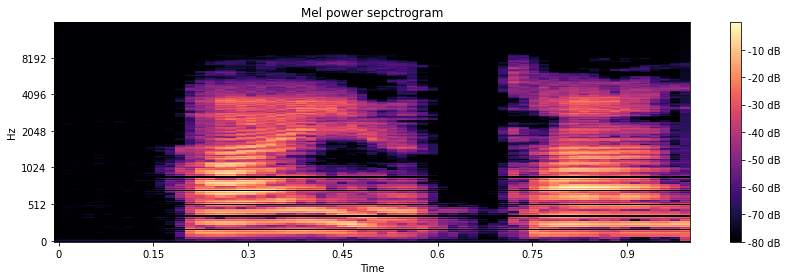

In [188]:
spectrogram = mel_spectrogram_process(signal, sr)
print(type(spectrogram))
plt.figure(figsize=(12,4))
librosa.display.specshow(spectrogram, sr=sr, x_axis='time', y_axis='mel')
plt.title('Mel power sepctrogram')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()

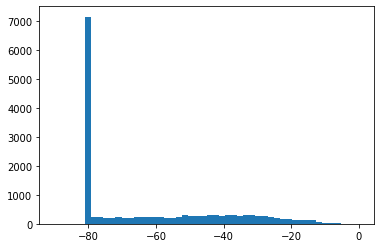

In [189]:
hist, bins = np.histogram(spectrogram, 50, [-90,0])
plt.hist(spectrogram.flatten(), 50, [-90,0])
plt.show()

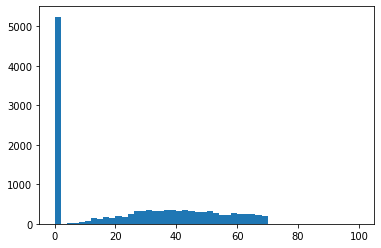

In [190]:
new_spectrogram = -spectrogram
cut_spectrogram = new_spectrogram[:][:-50]
zero_spectrogram = np.where( cut_spectrogram > 70 , 0, cut_spectrogram)

hist, bins = np.histogram(zero_spectrogram, 50, [0,100])
plt.hist(zero_spectrogram.flatten(), 50, [0,100])
plt.show()

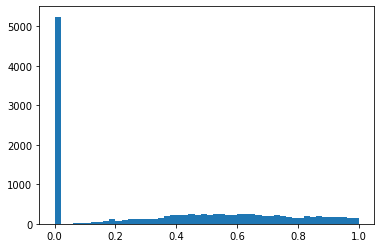

In [191]:
min_value = np.min(zero_spectrogram)
max_value = np.max(zero_spectrogram)

regul =  (zero_spectrogram - min_value) / (max_value - min_value)

hist, bins = np.histogram(regul, 50, [0,1])
plt.hist(regul.flatten(), 50, [0,1])
plt.show()

(206, 63)


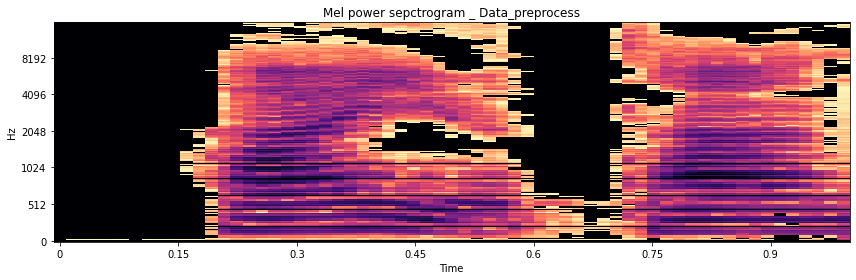

In [195]:
plt.figure(figsize=(12,4))
print(regul.shape)
librosa.display.specshow(regul, sr=sr, x_axis='time', y_axis='mel')
plt.title('Mel power sepctrogram _ Data_preprocess')
#plt.colorbar(format='%+02.0f dB')
plt.tight_layout()

# Spectrogram 모양 비교

(206, 38)


C:\Users\yutan\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Pass sr=32000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  """Entry point for launching an IPython kernel.
C:\Users\yutan\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Pass sr=32000, n_fft=1024 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  


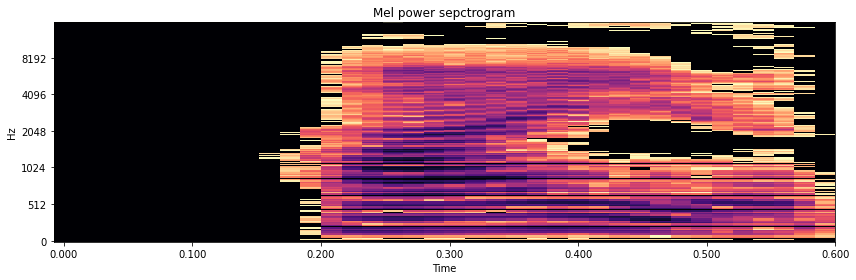

In [193]:
orig_signal, sr = librosa.core.load(data_path, sample_rate)
signal = orig_signal[int(-cut - click): int(-click)]

spectrogram = mel_spectrogram_process(signal, sr)
spectrogram = spectrogram_preprocess(spectrogram)

print(spectrogram.shape)
plt.figure(figsize=(12,4))
librosa.display.specshow(spectrogram, sr=sr, x_axis='time', y_axis='mel')
plt.title('Mel power sepctrogram')
# plt.colorbar(format='%+02.0f dB')
plt.tight_layout()

(206, 57)


C:\Users\yutan\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Pass sr=32000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  """Entry point for launching an IPython kernel.
C:\Users\yutan\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Pass sr=32000, n_fft=1024 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  


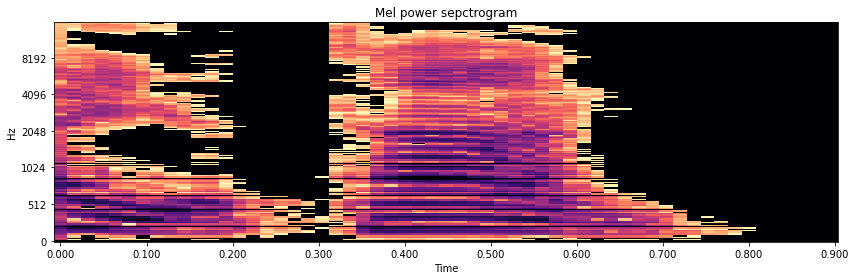

In [50]:

orig_signal, sr = librosa.core.load(data_path, sample_rate)
signal = orig_signal[int(-cut - click): int(-click)]

spectrogram = mel_spectrogram_process(signal, sr)
spectrogram = spectrogram_preprocess(spectrogram)

print(spectrogram.shape)
plt.figure(figsize=(12,4))
librosa.display.specshow(spectrogram, sr=sr, x_axis='time', y_axis='mel')
plt.title('Mel power sepctrogram')
# plt.colorbar(format='%+02.0f dB')
plt.tight_layout()

(206, 57)


C:\Users\yutan\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Pass sr=32000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  """Entry point for launching an IPython kernel.
C:\Users\yutan\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Pass sr=32000, n_fft=1024 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  


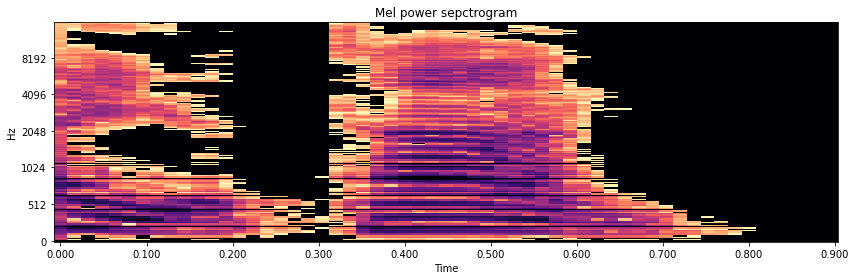

In [51]:

orig_signal, sr = librosa.core.load(data_path, sample_rate)
signal = orig_signal[int(-cut - click): int(-click)]

spectrogram = mel_spectrogram_process(signal, sr)
spectrogram = spectrogram_preprocess(spectrogram)

print(spectrogram.shape)
plt.figure(figsize=(12,4))
librosa.display.specshow(spectrogram, sr=sr, x_axis='time', y_axis='mel')
plt.title('Mel power sepctrogram')
# plt.colorbar(format='%+02.0f dB')
plt.tight_layout()

(206, 57)


C:\Users\yutan\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Pass sr=32000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  """Entry point for launching an IPython kernel.
C:\Users\yutan\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Pass sr=32000, n_fft=1024 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  


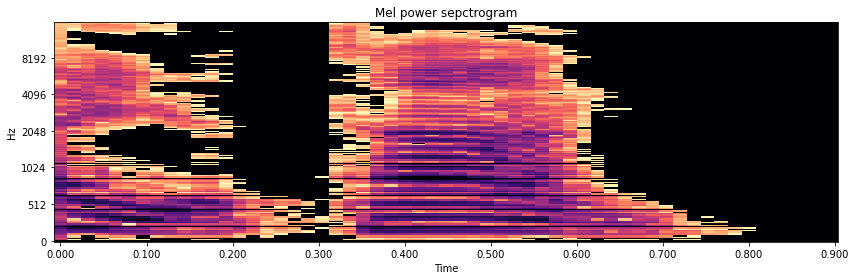

In [52]:

orig_signal, sr = librosa.core.load(data_path, sample_rate)
signal = orig_signal[int(-cut - click): int(-click)]

spectrogram = mel_spectrogram_process(signal, sr)
spectrogram = spectrogram_preprocess(spectrogram)

print(spectrogram.shape)
plt.figure(figsize=(12,4))
librosa.display.specshow(spectrogram, sr=sr, x_axis='time', y_axis='mel')
plt.title('Mel power sepctrogram')
# plt.colorbar(format='%+02.0f dB')
plt.tight_layout()

# 소리 확인

In [84]:
import librosa.display

In [169]:
# 원본
data_path = "./custum_dataset/user_01/hi_yutan/ori_user_01_0005_hi_yutan.wav"

orig_signal, sr = librosa.core.load(data_path, sample_rate)
fig = plt.figure(figsize = (14,5))
librosa.display.waveshow(orig_signal, sr=sr)

C:\Users\yutan\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Pass sr=32000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  after removing the cwd from sys.path.
C:\Users\yutan\anaconda3\envs\tensorflow\lib\site-packages\librosa\util\decorators.py:104: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(**kwargs)


FileNotFoundError: [Errno 2] No such file or directory: './custum_dataset/user_01/hi_yutan/noise_user_01_0005_hi_yutan.wav'

(256, 63)


C:\Users\yutan\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Pass sr=32000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  after removing the cwd from sys.path.
C:\Users\yutan\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Pass sr=32000, n_fft=1024 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  # This is added back by InteractiveShellApp.init_path()


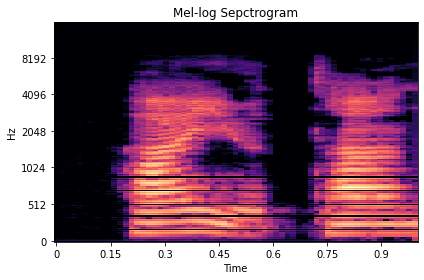

In [186]:
# 그냥 자른거
data_path = "./augmentation_dataset/user_01/hi_yutan/ori_user_01_0005_hi_yutan.wav"

signal, sr = librosa.core.load(data_path, sample_rate)

signal = signal / max(np.abs(signal))
# 오디오 데이터에 대해서 window size만큼 stft 해주기, 그리고 모두 양수로 만들어 뒤집어 주기
S = librosa.core.stft(signal, n_fft=n_fft, hop_length=hop_length, win_length=win_length)
D = np.abs(S)**2  # 모두 양수로 날려주기  

mel_basis = librosa.filters.mel(sr, n_fft, n_mels=n_mels)  
mel_S = np.dot(mel_basis, D)
# 마지막에는 log로 반환 해좌야 scale이 맞는다
log_S = librosa.power_to_db(mel_S, ref=np.max)

librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')
print(log_S.shape)
plt.title('Mel-log Sepctrogram')
# plt.colorbar(format='%+02.0f dB')
plt.tight_layout()

C:\Users\yutan\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Pass sr=32000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  after removing the cwd from sys.path.


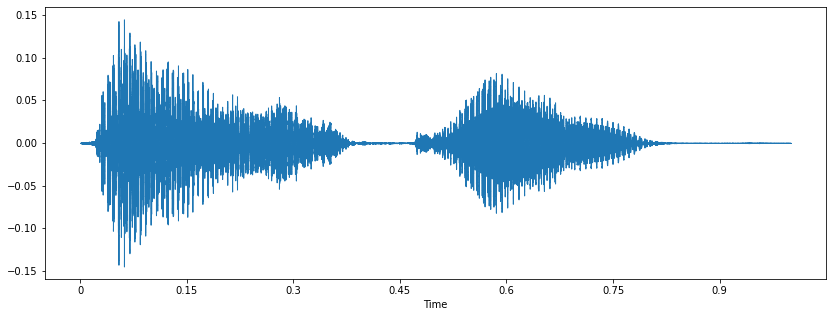

In [176]:
# 그냥 자른거
data_path = "./augmentation_dataset/user_01/hi_yutan/minus_user_01_0001_hi_yutan.wav"

signal, sr = librosa.core.load(data_path, sample_rate)
fig = plt.figure(figsize = (14,5))
librosa.display.waveshow(signal, sr=sr)

C:\Users\yutan\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Pass sr=32000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  after removing the cwd from sys.path.


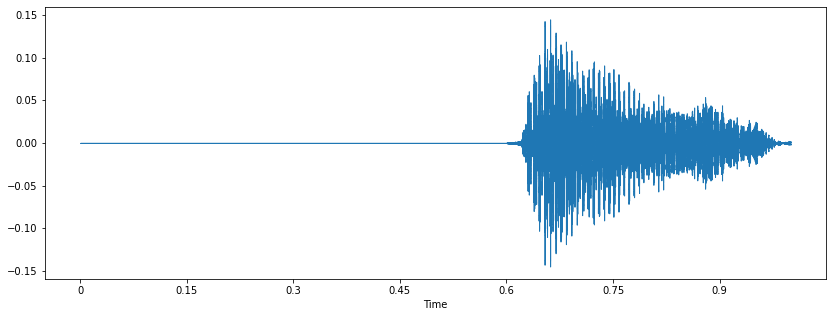

In [179]:
# 그냥 자른거
data_path = "./augmentation_dataset/user_01/other/shift_right_user_01_0001_hi_yutan_other.wav"

signal, sr = librosa.core.load(data_path, sample_rate)
fig = plt.figure(figsize = (14,5))
librosa.display.waveshow(signal, sr=sr)

C:\Users\yutan\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Pass sr=32000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  """Entry point for launching an IPython kernel.


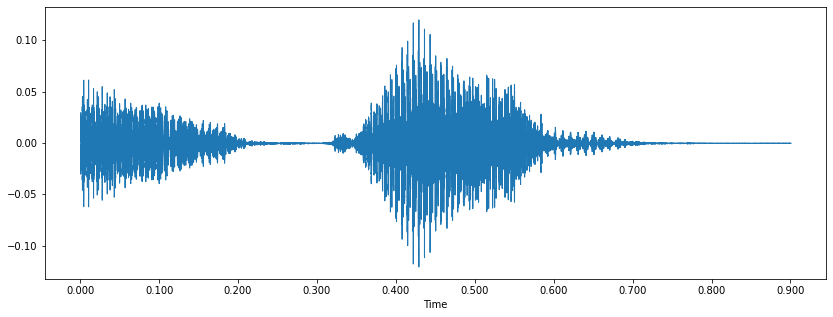

In [57]:
# 그냥 자른거
data_path = "./augmentation_dataset/user_01/hi_yutan/ori_user_01_0001_hi_yutan.wav"

signal, sr = librosa.core.load(data_path, sample_rate)
fig = plt.figure(figsize = (14,5))
librosa.display.waveshow(signal, sr=sr)

C:\Users\yutan\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Pass sr=32000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  """Entry point for launching an IPython kernel.


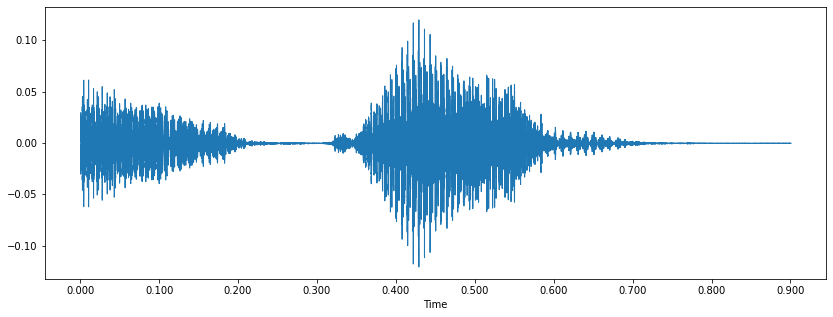

In [58]:

orig_signal, sr = librosa.core.load(data_path, sample_rate)
signal = orig_signal[int(-cut - click): int(-click)]
fig = plt.figure(figsize = (14,5))
librosa.display.waveshow(signal, sr=sr)

# Pitch Augmetation 추가 할것
- 다른 것도 sample rate 변경 해주기
- noise 추가에 대해서는, noise 크기 키워가면서 데이터 더 추가

/usr/local/lib/python3.7/dist-packages/librosa/filters.py:239: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  "Empty filters detected in mel frequency basis. "


(206, 63)


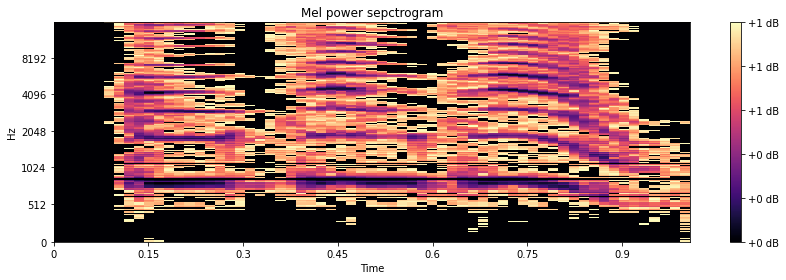

In [158]:
# 무작위로 음 높이 (pitch)를 수정 하기


def pitch_sound(data, sr, pitch_factor=24):   # end_path, count,
    sig, sr = librosa.load(data, sr=sample_rate)
    pitch_data = librosa.effects.pitch_shift(sig, sample_rate, pitch_factor)
    #sf.write( end_path, stretch_data, sr)
    return pitch_data

data_path = "/content/drive/MyDrive/augmentation_dataset/hey_tantan/voice0020_hey_tantan.wav"

orig_signal = pitch_sound(data_path, sr)

signal = orig_signal[int(-cut - click): int(-click)]

spectrogram = mel_spectrogram_process(signal, sr)
spectrogram = spectrogram_preprocess(spectrogram)

print(spectrogram.shape)
plt.figure(figsize=(12,4))
librosa.display.specshow(spectrogram, sr=sr, x_axis='time', y_axis='mel')
plt.title('Mel power sepctrogram')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()



/usr/local/lib/python3.7/dist-packages/librosa/filters.py:239: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  "Empty filters detected in mel frequency basis. "


(206, 63)


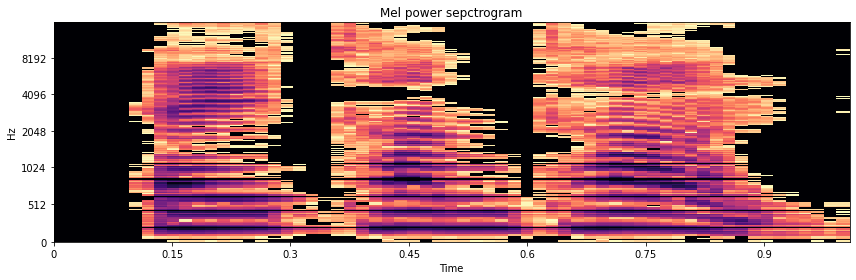

In [170]:
# 원본
data_path = "/content/drive/MyDrive/augmentation_dataset/hey_tantan/voice0020_hey_tantan.wav"
orig_signal, sr = librosa.core.load(data_path, sample_rate)
signal = orig_signal[int(-cut - click): int(-click)]

spectrogram = mel_spectrogram_process(signal, sr)
spectrogram = spectrogram_preprocess(spectrogram)

print(spectrogram.shape)
plt.figure(figsize=(12,4))
librosa.display.specshow(spectrogram, sr=sr, x_axis='time', y_axis='mel')
plt.title('Mel power sepctrogram')
# plt.colorbar(format='%+02.0f dB')
plt.tight_layout()

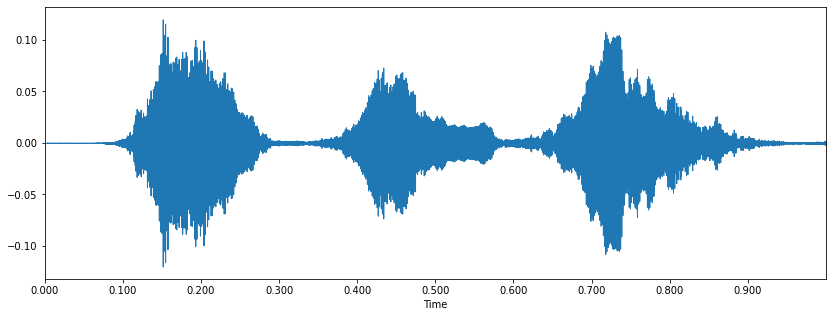

In [159]:
fig = plt.figure(figsize = (14,5))
librosa.display.waveplot(signal, sr=sample_rate)

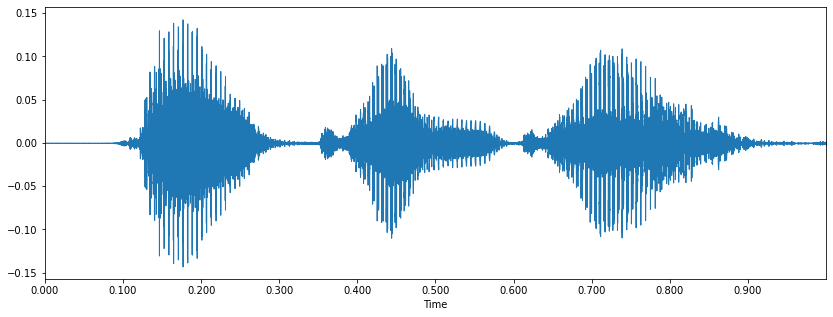

In [160]:
data_path = "/content/drive/MyDrive/augmentation_dataset/hey_tantan/voice0020_hey_tantan.wav"

orig_signal, sr = librosa.core.load(data_path, sample_rate)
signal = orig_signal[int(-cut - click): int(-click)]
fig = plt.figure(figsize = (14,5))
librosa.display.waveplot(signal, sr=sr)

# MFCC 결과 확인 하기

In [161]:
#data_path = "/content/drive/MyDrive/custum_dataset/hi_yutan/voice0020_hi_yutan.wav"
data_path = "/content/drive/MyDrive/augmentation_dataset/hey_tantan/voice0020_hey_tantan.wav"

signal, sr = librosa.core.load(data_path, sample_rate)
signal = signal[int(-cut - click): int(-click)]

/usr/local/lib/python3.7/dist-packages/librosa/filters.py:239: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  "Empty filters detected in mel frequency basis. "


(13, 63)


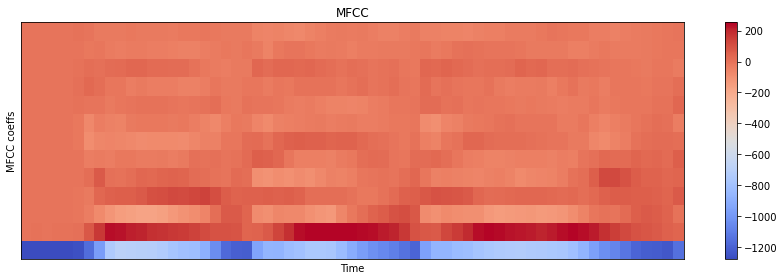

In [162]:
# log-mel Spectrogram 먼저 가져온 다음에
# spectogram = mel_spectrogram_process(signal, sr)
mfcc  = mfcc_process(signal, sr)
delta2_mfcc = librosa.feature.delta(mfcc, order=2)
plt.figure(figsize=(12,4))
librosa.display.specshow(mfcc)
plt.ylabel('MFCC coeffs')
plt.xlabel('Time')
plt.title('MFCC')
plt.colorbar()
plt.tight_layout()
print(mfcc.shape)

(13, 63)


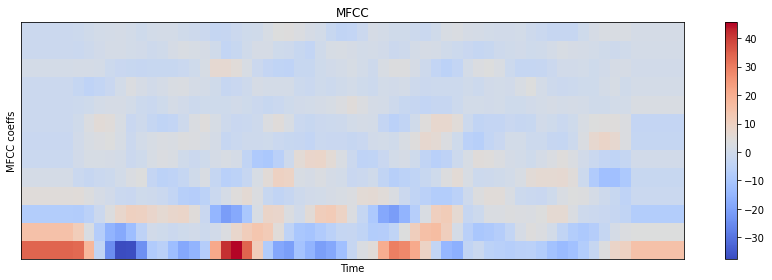

In [163]:
plt.figure(figsize=(12,4))
librosa.display.specshow(delta2_mfcc)
plt.ylabel('MFCC coeffs')
plt.xlabel('Time')
plt.title('MFCC')
plt.colorbar()
plt.tight_layout()
print(mfcc.shape)

# 실시간 _ 저전력 모드 idea

In [164]:
n_fft=1024
hop_length=512
win_length=1024
sample_rate = 32000
wav_time = 1

n_mels=256
n_mfcc=13

sampel_cut  =   sample_rate*wav_time   #32000   # 38400

click = sample_rate * 0.2
stride_rate = 4
CHUNK = sampel_cut / stride_rate   # 8000

In [165]:
real_time = np.array([ [i,i] for i in range(10)])

real_time = np.array([ [1,1],[1,1],[1,1],[1,1],[1,1],[1,1],[1,1],[1,1],[2,2],[3,3],[4,4],[5,5],[6,6],[7,7],[1,1],[1,1],[1,1],[1,1],[1,1],[1,1],[1,1],[1,1],[1,1],[1,1],[1,1],[1,1],[1,1],[1,1] ]  )

frame = [[1,1]]

for data in real_time:
  if np.mean(frame) <= 2:
    if np.array(frame).shape[0] == stride_rate:
      frame.pop(0)
      frame.append(data)
      result = frame[0]
      for i in range(1, stride_rate):
        result = np.concatenate( (result, frame[i]), axis = 0   )
    else:
      frame.append(data)
    print("저전력")
    continue

  if np.array(frame).shape[0] == stride_rate:
    frame.pop(0)
    frame.append(data)
    result = frame[0]
    for i in range(1, stride_rate):
      result = np.concatenate( (result, frame[i]), axis = 0   )
    print(result)
  else:
    frame.append(data)

  print(frame)


저전력
저전력
저전력
저전력
저전력
저전력
저전력
저전력
저전력
저전력
저전력
[2 2 3 3 4 4 5 5]
[array([2, 2]), array([3, 3]), array([4, 4]), array([5, 5])]
[3 3 4 4 5 5 6 6]
[array([3, 3]), array([4, 4]), array([5, 5]), array([6, 6])]
[4 4 5 5 6 6 7 7]
[array([4, 4]), array([5, 5]), array([6, 6]), array([7, 7])]
[5 5 6 6 7 7 1 1]
[array([5, 5]), array([6, 6]), array([7, 7]), array([1, 1])]
[6 6 7 7 1 1 1 1]
[array([6, 6]), array([7, 7]), array([1, 1]), array([1, 1])]
[7 7 1 1 1 1 1 1]
[array([7, 7]), array([1, 1]), array([1, 1]), array([1, 1])]
[1 1 1 1 1 1 1 1]
[array([1, 1]), array([1, 1]), array([1, 1]), array([1, 1])]
저전력
저전력
저전력
저전력
저전력
저전력
저전력
저전력
저전력
저전력


# 음성 합성 -- 검토 중

In [175]:
import os

/content/drive/MyDrive/_background_noise_


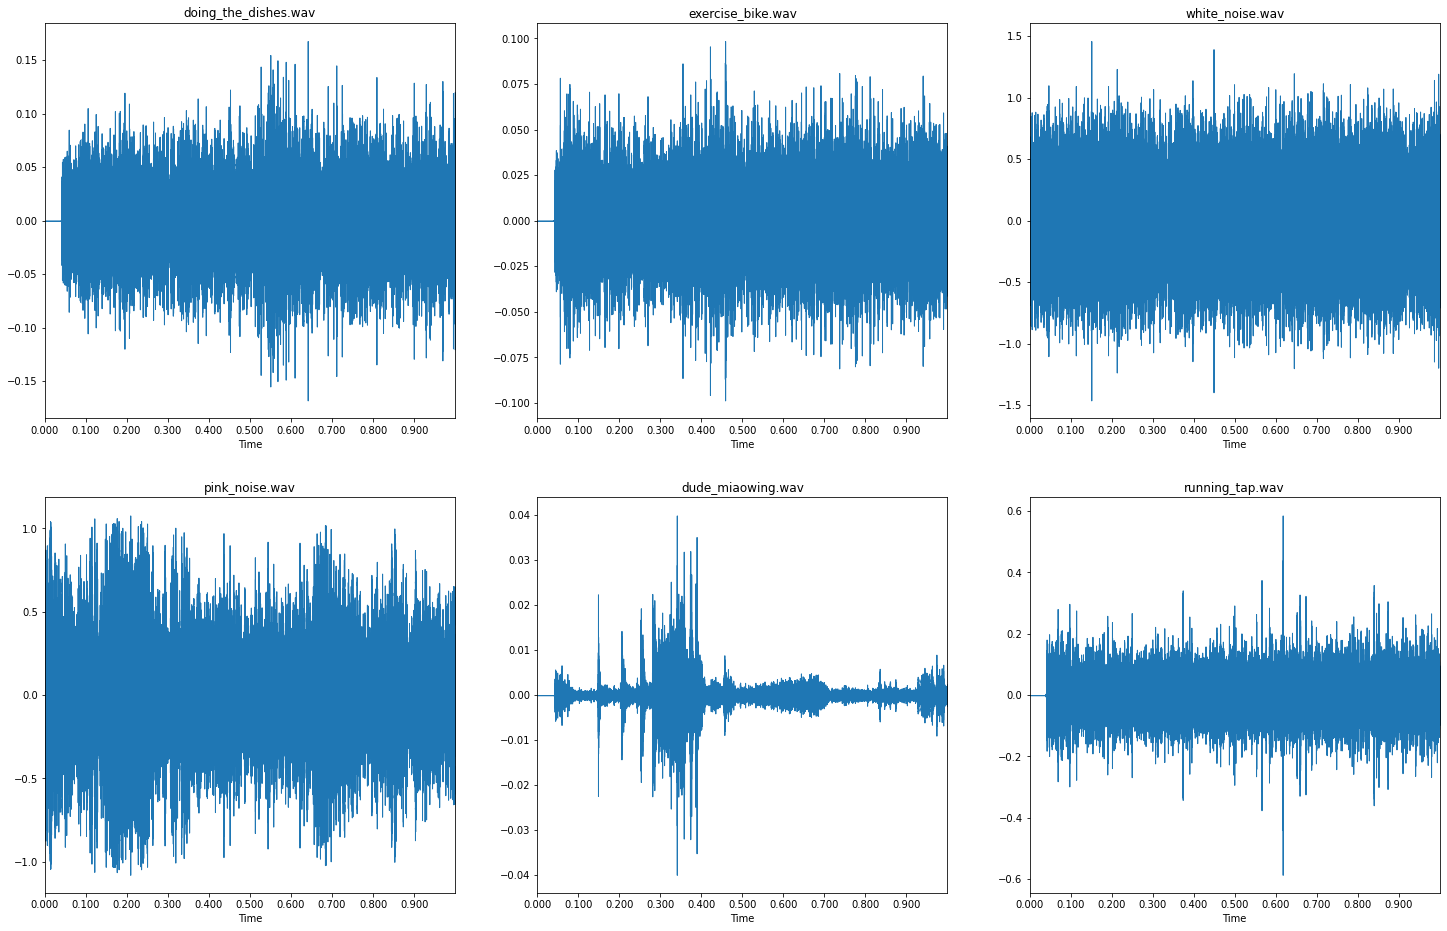

In [185]:
back_base_path = "/content/drive/MyDrive/_background_noise_"
back_ground_sound_list = os.listdir(back_base_path)
print(back_base_path)

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(25, 16))
for row in range(2):
  for col in range(3):
    idx = row*3 + col
    if idx < len(back_ground_sound_list):
      ax = axes[row][col]
      signal, sr = librosa.core.load(back_base_path + '/'+back_ground_sound_list[idx] , sample_rate)
      signal = signal[: 32000]
      ax.set_title(back_ground_sound_list[idx])
      librosa.display.waveplot(signal, sr=sr, ax = ax)



# signal, sr = librosa.core.load(data_path, sample_rate)
# # signal = orig_signal[int(-cut - click): int(-click)]
# fig = plt.figure(figsize = (14,5))
# plt.title("Doin_the_dishes")
# librosa.display.waveplot(signal, sr=sr)

# 새로운 모델 !!

In [200]:
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, BatchNormalization, LeakyReLU
from tensorflow.keras import Sequential
from configuration import Config

#######
#Trainable params: 372,166
def detection_model_01(sample_shape):
    model = Sequential([
        # conv layer 부분
        Conv2D(32, (3, 3), activation='relu', input_shape=sample_shape, kernel_initializer='he_normal'),
        MaxPooling2D(pool_size=(3, 3)),
        Conv2D(64, (3, 3), activation='relu', padding="same", kernel_initializer='he_normal'),
        MaxPooling2D(pool_size=(3, 3)),
        Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal'),
        MaxPooling2D(pool_size=(3, 3)),

        # FC layer 부분
        Flatten(),
        Dense(256, activation='relu', kernel_initializer='he_normal'),
        Dense(256, activation='relu', kernel_initializer='he_normal'),
        Dropout(0.5),
        Dense(64, activation='relu'),
        Dense(len(Config.target_list), activation="softmax", kernel_initializer='he_normal')
    ])

    return model


# 모델 크기가 작은 거 !!!
def detection_model_02(sample_shape):
    model = Sequential([
        # conv layer 부분
        Conv2D(32, (3, 3), activation=LeakyReLU(alpha=0.3), input_shape=sample_shape, kernel_initializer='he_normal'),
        MaxPooling2D(pool_size=(3, 3)),
        Conv2D(128, (3, 3), activation=LeakyReLU(alpha=0.3), kernel_initializer='he_normal'),
        MaxPooling2D(pool_size=(3, 3)),

        # FC layer 부분
        Flatten(),
        Dense(64, activation=LeakyReLU(alpha=0.3), kernel_initializer='he_normal'),
        Dropout(0.5),
        Dense(64, activation=LeakyReLU(alpha=0.3), kernel_initializer='he_normal'),
        Dense(len(Config.target_list), activation="softmax", kernel_initializer='he_normal')
    ])
    return model


# 인식 전용 모델
#######
# Trainable params: 565,731
def recog_model_01(sample_shape):
    model = Sequential([
        # conv layer 부분
        Conv2D(32, (3, 3), activation=LeakyReLU(alpha=0.3), input_shape=sample_shape, kernel_initializer='he_normal'),
        Conv2D(32, (3, 3), activation=LeakyReLU(alpha=0.3), kernel_initializer='he_normal'),
        MaxPooling2D(pool_size=(3, 3)),
        Conv2D(64, (3, 3), activation=LeakyReLU(alpha=0.3), padding='same', kernel_initializer='he_normal'),
        Conv2D(64, (3, 3), activation=LeakyReLU(alpha=0.3), kernel_initializer='he_normal'),
        MaxPooling2D(pool_size=(3, 3)),
        Conv2D(128, (3, 3), activation=LeakyReLU(alpha=0.3), padding='same', kernel_initializer='he_normal'),
        Conv2D(128, (3, 3), activation=LeakyReLU(alpha=0.3), kernel_initializer='he_normal'),
        MaxPooling2D(pool_size=(3, 3)),

        # FC layer 부분
        Flatten(),
        Dense(256, activation=LeakyReLU(alpha=0.3), kernel_initializer='he_normal'),
        Dense(256, activation=LeakyReLU(alpha=0.3), kernel_initializer='he_normal'),
        Dropout(0.5),
        Dense(64, activation=LeakyReLU(alpha=0.3), kernel_initializer='he_normal'),
        Dense(len(Config.user_list), activation="softmax", kernel_initializer='he_normal')
    ])
    return model

# Trainable params: 730,563
def recog_model_02(sample_shape):
    model = Sequential([
        # conv layer 부분
        Conv2D(32, (4, 2), activation=LeakyReLU(alpha=0.3), input_shape=sample_shape, kernel_initializer='he_normal' ),
        Conv2D(32, (4, 2), activation=LeakyReLU(alpha=0.3), kernel_initializer='he_normal'),
        MaxPooling2D(pool_size=(4, 2)),
        Conv2D(64, (4, 2), activation=LeakyReLU(alpha=0.3), padding='same', kernel_initializer='he_normal'),
        Conv2D(64, (4, 2), activation=LeakyReLU(alpha=0.3), kernel_initializer='he_normal'),
        MaxPooling2D(pool_size=(4, 2)),
        Conv2D(128, (4, 2), activation=LeakyReLU(alpha=0.3), padding='same', kernel_initializer='he_normal'),
        Conv2D(128, (4, 2), activation=LeakyReLU(alpha=0.3), kernel_initializer='he_normal'),
        MaxPooling2D(pool_size=(4, 2)),

        # FC layer 부분
        Flatten(),
        Dense(256, activation=LeakyReLU(alpha=0.3), kernel_initializer='he_normal'),
        Dense(256, activation=LeakyReLU(alpha=0.3), kernel_initializer='he_normal'),
        Dropout(0.5),
        Dense(64, activation=LeakyReLU(alpha=0.3), kernel_initializer='he_normal'),
        Dense(len(Config.user_list), activation="softmax")
    ])
    return model

input_shape = (206 , 63, 1)

In [201]:
model = detection_model_01(input_shape)
model.summary()
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png')
plot_model(model, to_file='model_shapes.png', show_shapes=True)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 204, 61, 32)       320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 68, 20, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 68, 20, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 22, 6, 64)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 20, 4, 128)        73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 6, 1, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 768)              

# to do
1. data augmentation 파일 수정 - rate & add pitch
2. sample rate 변경 하며, 데이터 생성 
3. data preprocess 수행  (둘다)
4. train, 수행
5. tflite 변환
6. realtime_wuw 수정 (저전력 모든 samplerate 변경 하며)
7. pruning 다시 해보기 (trade-off 관계 다시 확인 해보기)

#next
1. 끊긴 기동어 얻기 
  - 왼쪽에  4000 추가, 32000만큰 자르기, -> 반복   ( 16000,24000 )
  - 오른쪽도 마찬가지로 반복 
  - 여기서 수집 한거는, 예외 데이터로 처리 (cutting_class 만들어 주기)
  

# 최종 피피티

1. 프로젝트 배경
  - Edge에서 음성 처리 서비스 현황
  - 기동어 인식 시스템의 필요성 (대기 상태 전환)
  - 으으음.....

2. 문제 정의
  - Edge 장치 자원을 통한 음성 처리의 어려움 

3. 프로젝트 목표
  - " 저성능 칩에서 활용 가능한 기동어 인식 시스템 개발 "
    - 노이즈에 강건한 기동어 검출 모델
    - 저성능 칩셋 최적화 ( 저전력 모드, 모델 경량화 - Pruning )
    - 전력 효율적인 시스템 설계 (검출 > 검증  -  기동어 인식 대기 상태)
  - 제약 사항
    - 화자 거리 1m 이내

4. 방법론
  - 시스템 구조도
  - 데이터셋 선정
  - 데이터 전처리
    - 음성 신호 특징 추출(Mel log Spectrogram)
    - 이미지 전처리
  - 기동어 검출 알고리즘 ( 일반화 모델 학습 0
  - 화자 검증 알고리즘 (조금더 깊음)
  - 모델 학습 및 경량화
  - 기동어 인식 대기 상태 전환

5. 결과
  - 기동어 검출 알고리즘 평가
  - 화자 검증 알고리즘 평가
  - Confusion Matrix , Acc, precision, recall
  - 실시간 (시간 단위 평가????) 

6. Demo
  - 영상 넣기, 또는 코드로 직접 test

7. 토의 및 기대 효과
  - 세부 목표 별 개인적인 평가 넣기 
    - 내가 한거에 대한 평가
  - 내부적 기대효과
    - Edge 전력 소모량 감소
    - 화자에 따른 서비스 
    - 빠른 서비스 대응
  - 외부적 기대효과
    - 중앙 서버 과부화 감소


8. 한계점 및 미래연구
  - 내가 만들지 않은 것에 대한 한계점
  - 추가로 더 하면 좋을 것들

- 목표
 잡음 환경에 강건한 모델
 저성능 칩셋에 적합한 시스템
    -- 모델의 간소화        ( 용량 및 전력 소모 )
    -- 저전력 모드            ( 전력 소모 감소 )
    -- 학습 모델 pruning  (저 용량 )
    -- 상황에 따른 화자 분석  (전력 소모 감소)



한계점, 문제점
- 기동어 감지 모델의 일반화 부족
-> 다양한 class에 대해서, 다양한 화자가 여러 녹음을 진행 해야함
( user 30명 이상이 class별로 50개 이상의 데이터를 수집 해야함)

- 녹음 데이터의 불완전성
-> 실제 사용 녹음 데이터는, 각 파일 마다 불필요한 부분에 대한 사전 편집을 진행함
- 기동 인식을 위해서는 녹음된 데이터에 대해 사전 편집 필요

-
